# Generic Imports

Run these cells first to set up python and import basic libraries like numpy and pandas.

In [1]:
import sys

assert sys.version_info >= (3, 10)

Scikit=Learn >= 1.6.1

In [2]:
from packaging.version import Version
import sklearn

assert Version(sklearn.__version__) >= Version("1.6.1")

In [3]:
from pathlib import Path

# Loading the data
import tarfile
import urllib.request

# Data science

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix

Default font sizes for matplotlin to plot pretty figures:

In [4]:

plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Scikit-Learn Imports

Run these imports to load all the scikit classes, models and utility functions you'll use throughout the code.

In [5]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

## Preprocessing imports

# Utility functions

In [26]:
# def square_correlation_plot(attributes) -> None:
#     scatter_matrix(housing_full[attributes], figsize=(15, 15), grid=True)

#     plt.show()

    # sns.pairplot(housing_full[attributes],  
    #              diag_kind='kde',  # 'kde' for density, 'hist' for histogram
    #              plot_kws={'alpha': 0.6, 'edgecolor': 'k', 'linewidth': 0.5},
    #              height=3)
    # plt.suptitle('Pairwise Relationships', y=1.02)
    # plt.show()
    
def square_correlation_plot(attributes) -> None:
    # Calculate correlations
    corr_matrix = housing_full[attributes].corr()

    # Create pairplot
    g = sns.pairplot(housing_full[attributes], 
                        diag_kind='kde',
                        plot_kws={'alpha': 0.6, 's': 20},
                        height=2.5)

    # Add correlation coefficients to upper triangle
    for i, j in zip(*np.triu_indices_from(g.axes, 1)):
        corr = corr_matrix.iloc[i, j]
        g.axes[i, j].annotate(f'ρ={corr:.2f}', 
                                xy=(0.5, 0.9), 
                                xycoords='axes fraction',
                                ha='center', fontsize=9,
                                bbox=dict(boxstyle="round,pad=0.3", 
                                        facecolor="white", alpha=0.8))

    plt.suptitle(f'Pair Plot with Correlation Coefficients for:\n{attributes}', y=1.02)
    plt.tight_layout()
    plt.show()
    

# Loading the data

In [7]:
def load_data(file_name: str) -> pd.DataFrame:
    data_root = "https://raw.githubusercontent.com/Ray-Man05/handson-mlp-main/refs/heads/main/data/Kaggle/"
    ext = ".csv"
    file_name = file_name + ext if not file_name.endswith(ext) else file_name
    
    try:
        df = pd.read_csv(data_root + file_name)
        return df
    except Exception as e:
        print(e)

def load_housing_data() -> pd.DataFrame:
    return load_data("train.csv")

In [8]:
housing_full = load_housing_data()
housing_raw = load_housing_data()

# Exploring the data

In [9]:
housing_full.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Listing out features

In [10]:
housing_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Correlation

In [11]:
corr_matrix = housing_full.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [12]:
housing_extra_features = pd.DataFrame()
housing_extra_features["SalePrice"] = housing_full["SalePrice"]

# Define the new column
housing_extra_features['bath_per_bedroom'] = (housing_full['FullBath'] + 0.5*housing_full['HalfBath']) / housing_full['BedroomAbvGr']
housing_extra_features['house_age'] = housing_full['YrSold'] - housing_full['YearBuilt']
housing_extra_features['years_since_remod'] = housing_full['YrSold'] - housing_full['YearRemodAdd']
housing_extra_features['was_remodeled'] = (housing_full['YearRemodAdd'] != housing_full['YearBuilt']).astype(int)

housing_extra_features['quality_area'] = housing_full['OverallQual'] * housing_full['GrLivArea']
housing_extra_features['basement_score'] = housing_full['TotalBsmtSF'] * housing_full['OverallQual']

housing_extra_features['has_basement'] = (housing_full['TotalBsmtSF'] > 0).astype(int)
housing_extra_features['has_pool'] = (housing_full['PoolArea'] > 0).astype(int)
housing_extra_features['has_2nd_floor'] = (housing_full['2ndFlrSF'] > 0).astype(int)

housing_extra_features['total_porch_area'] = (housing_full['WoodDeckSF'] + 
                                     housing_full['OpenPorchSF'] + 
                                     housing_full['EnclosedPorch'] + 
                                     housing_full['3SsnPorch'] + 
                                     housing_full['ScreenPorch'])

housing_extra_features['basement_finished_pct'] = (housing_full['BsmtFinSF1'] + housing_full['BsmtFinSF2']) / housing_full['TotalBsmtSF'].replace(0, 1)

neighborhood_avg = housing_full.groupby('Neighborhood')['SalePrice'].transform('mean')
housing_extra_features['neighborhood_avg_price'] = neighborhood_avg

corr_matrix = housing_extra_features.corr(numeric_only=True)
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice                 1.000000
quality_area              0.832057
basement_score            0.754265
neighborhood_avg_price    0.738630
bath_per_bedroom          0.424531
total_porch_area          0.390993
has_basement              0.152829
has_2nd_floor             0.137656
basement_finished_pct     0.131880
has_pool                  0.093708
was_remodeled            -0.021933
years_since_remod        -0.509079
house_age                -0.523350
Name: SalePrice, dtype: float64

# Plots

## Basic Plots

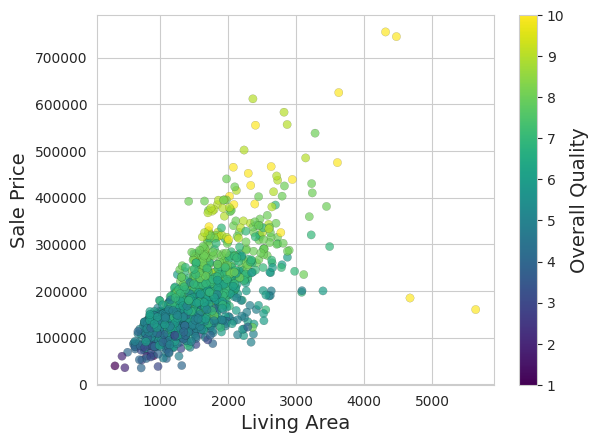

In [13]:
sns.set_style("whitegrid")

# Scatter plot with color by OverallQual
ax=sns.scatterplot(data=housing_full, x='GrLivArea', y='SalePrice', 
                hue='OverallQual', palette='viridis', 
                alpha=0.7, edgecolor='black', linewidth=0.1, legend=False)
plt.xlabel('Living Area')
plt.ylabel('Sale Price')

norm = plt.Normalize(housing_full['OverallQual'].min(), housing_full['OverallQual'].max())
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Overall Quality')

plt.show()

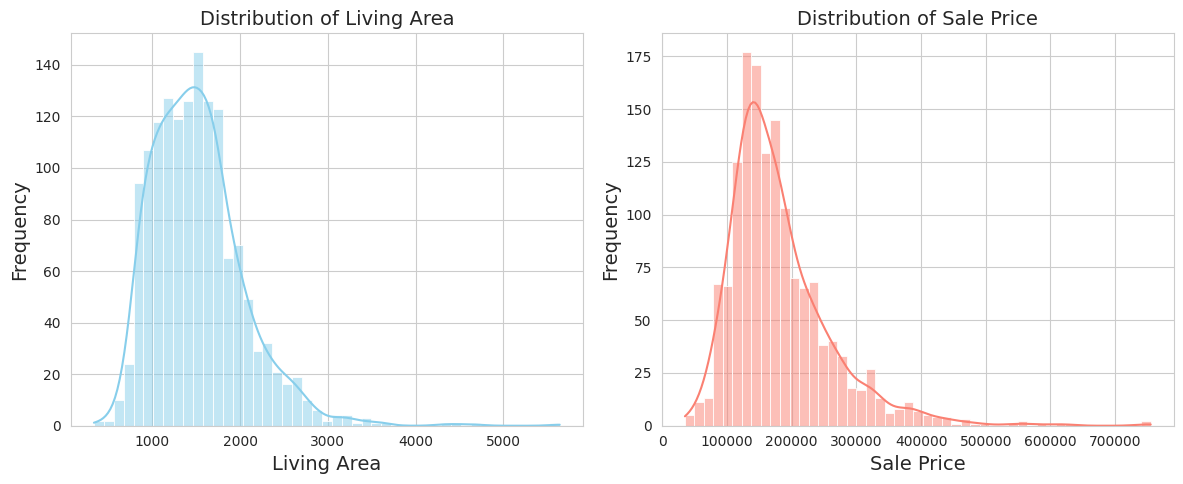

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Distribution of SalePrice
sns.histplot(data=housing_full, x='SalePrice', kde=True, ax=ax1, color='salmon')
ax1.set_xlabel('Sale Price')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of Sale Price')

# Distribution of GrLivArea
sns.histplot(data=housing_full, x='GrLivArea', kde=True, ax=ax2, color='skyblue')
ax2.set_xlabel('Living Area')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Living Area')



plt.tight_layout()
plt.show()

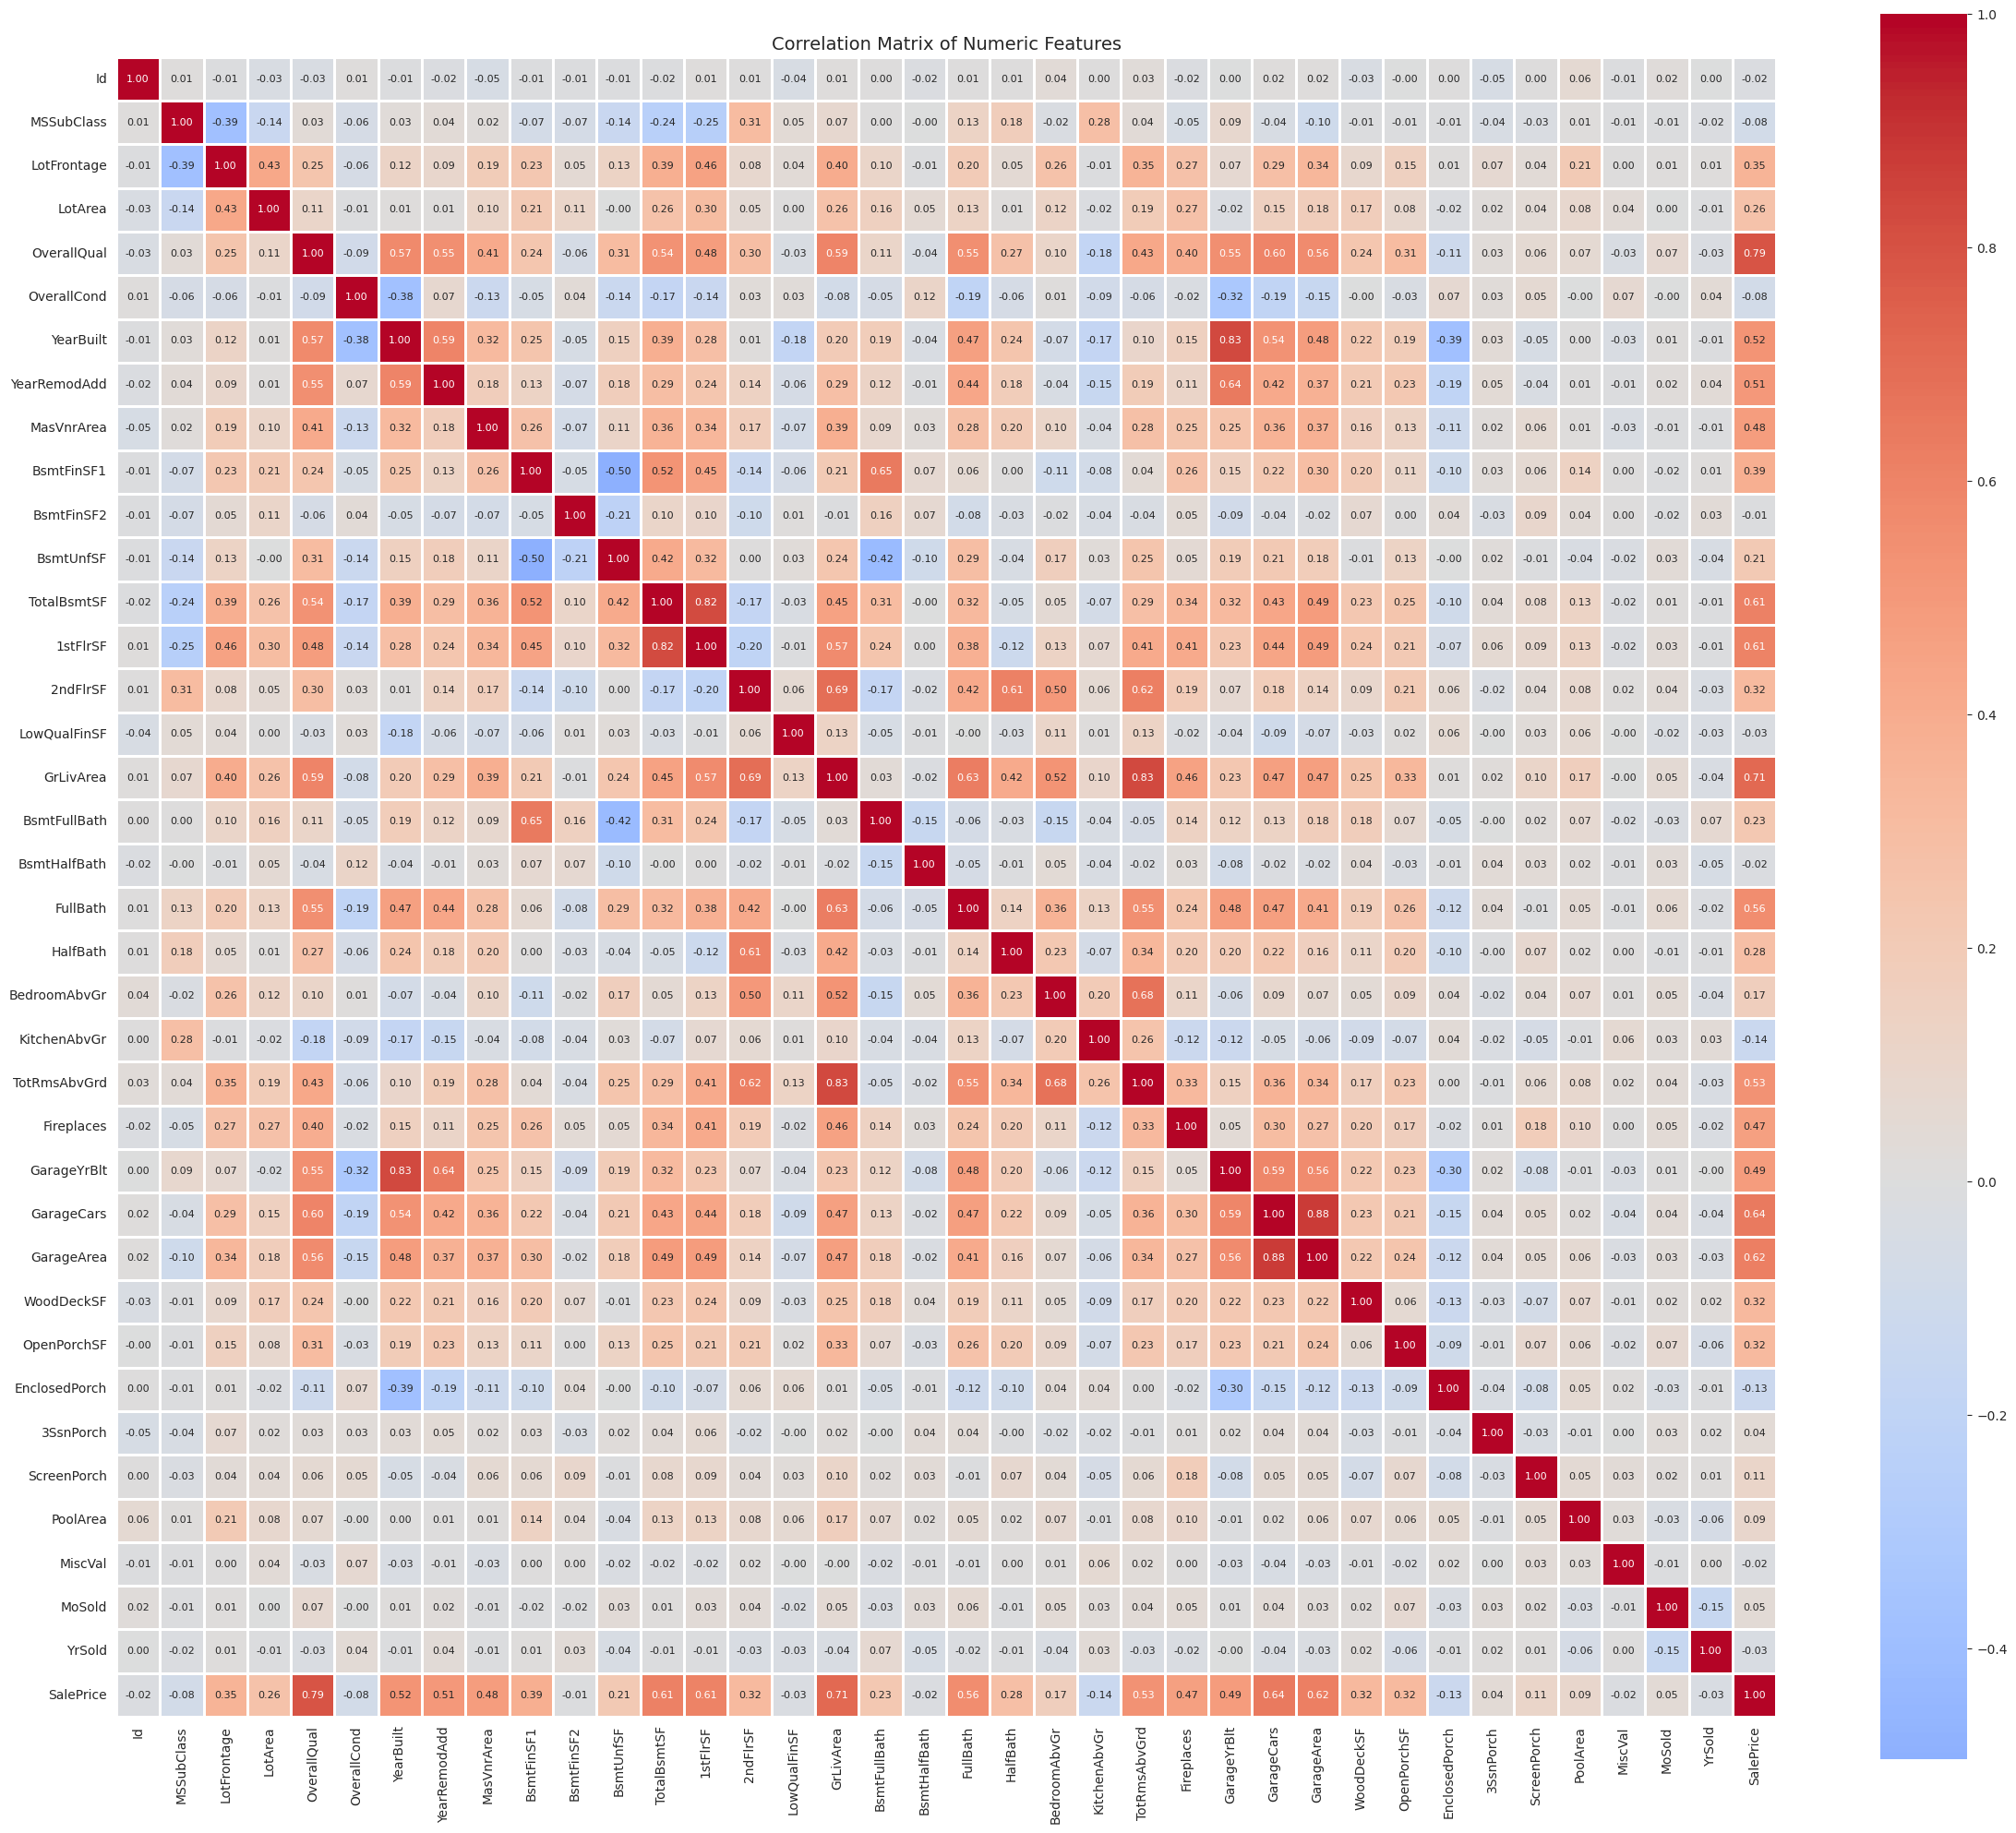

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

housing_full = housing_raw.copy()

# Get only numeric columns
numeric_cols = housing_full.select_dtypes(include=[np.number]).columns
correlation = housing_full[numeric_cols].corr()

# Create heatmap
plt.figure(figsize=(24, 24))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', linewidths=1, 
            annot_kws={"size": 8}, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

## Correlation Plots

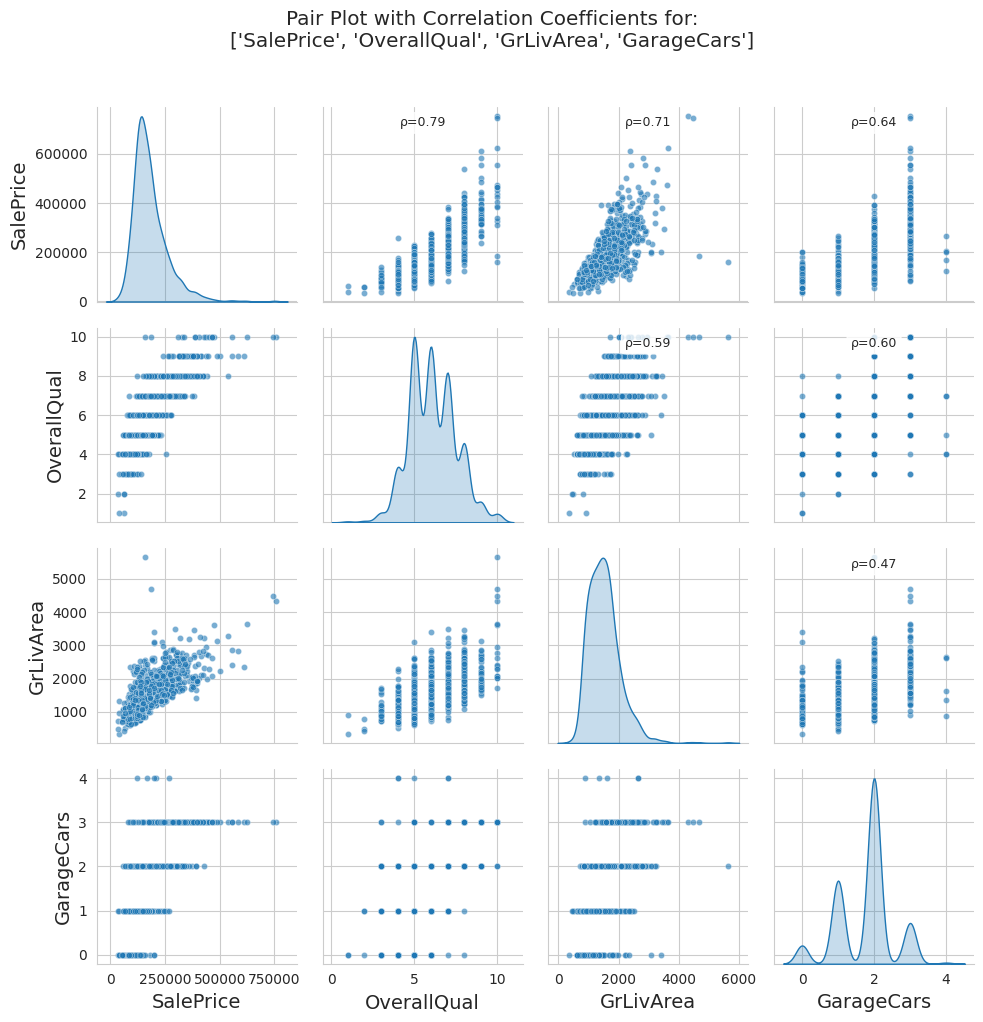

In [25]:
square_correlation_plot(["SalePrice", "OverallQual", "GrLivArea", "GarageCars"])

    

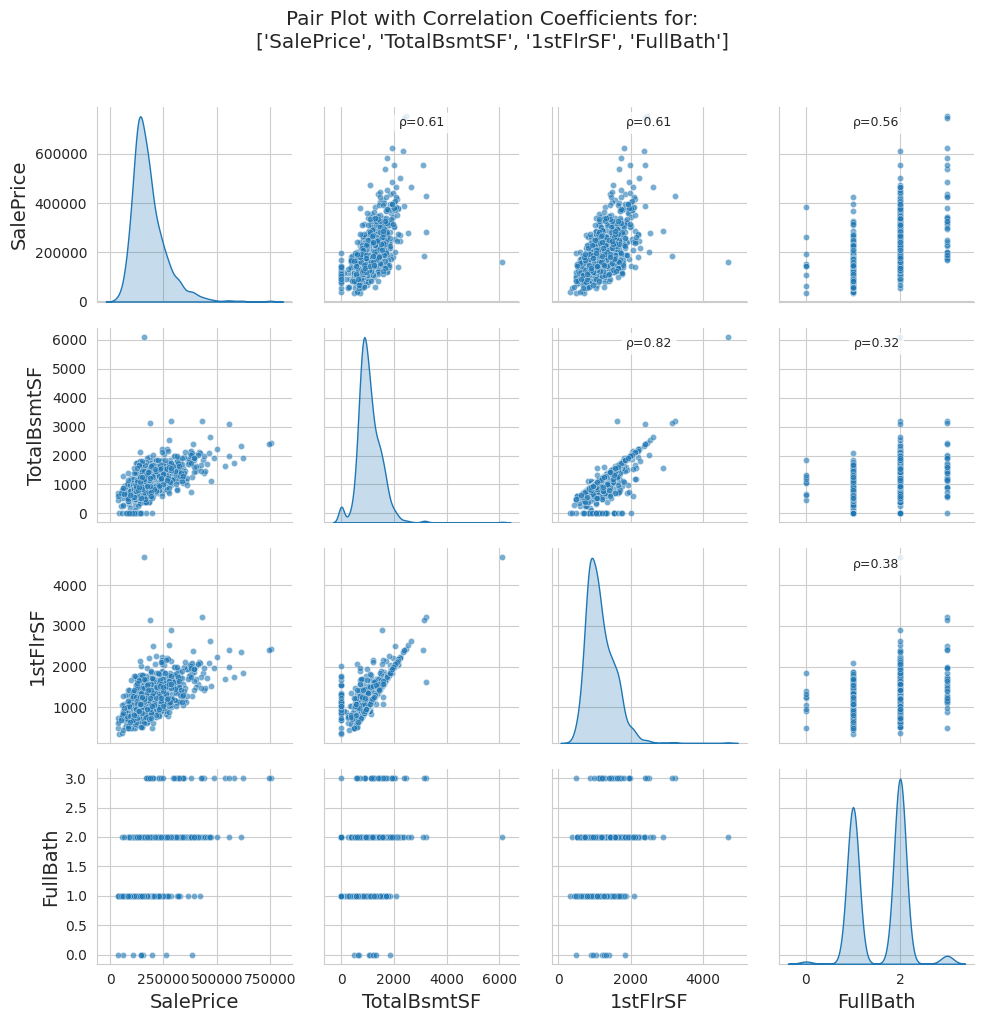

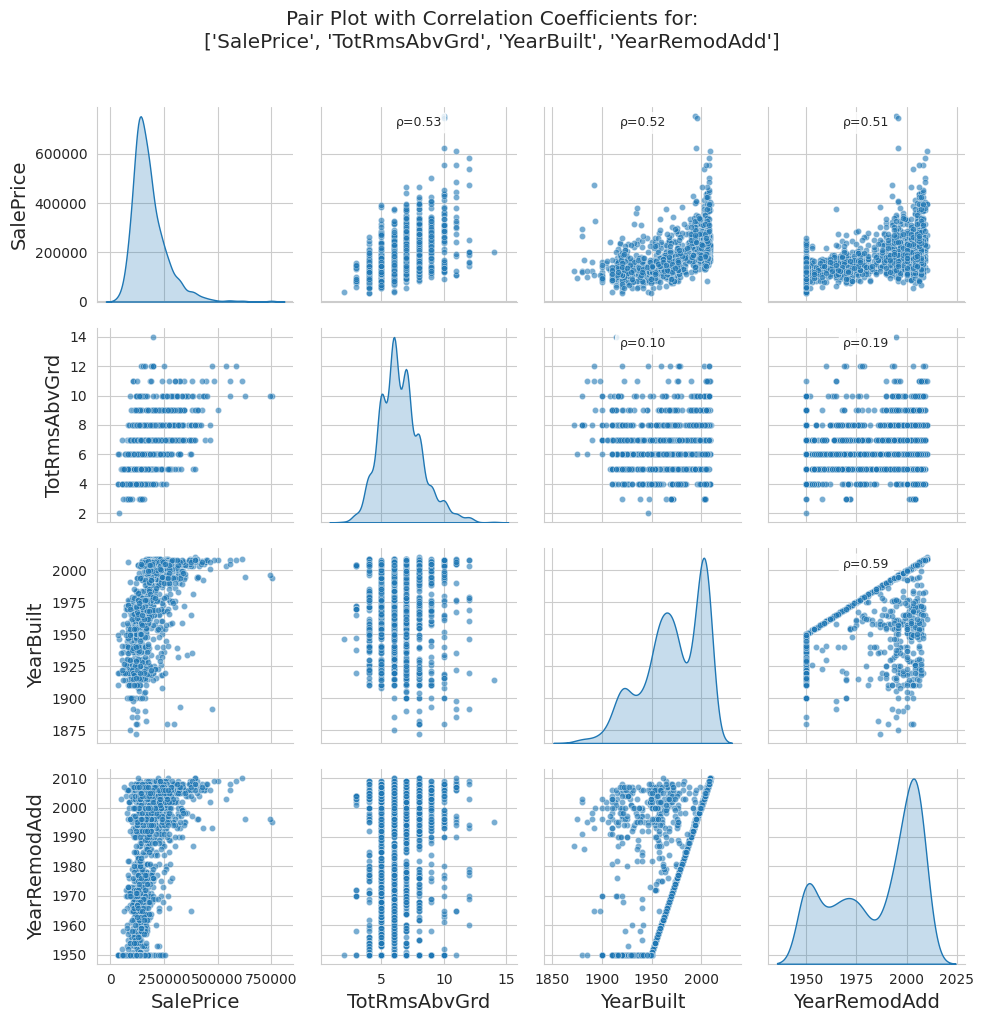

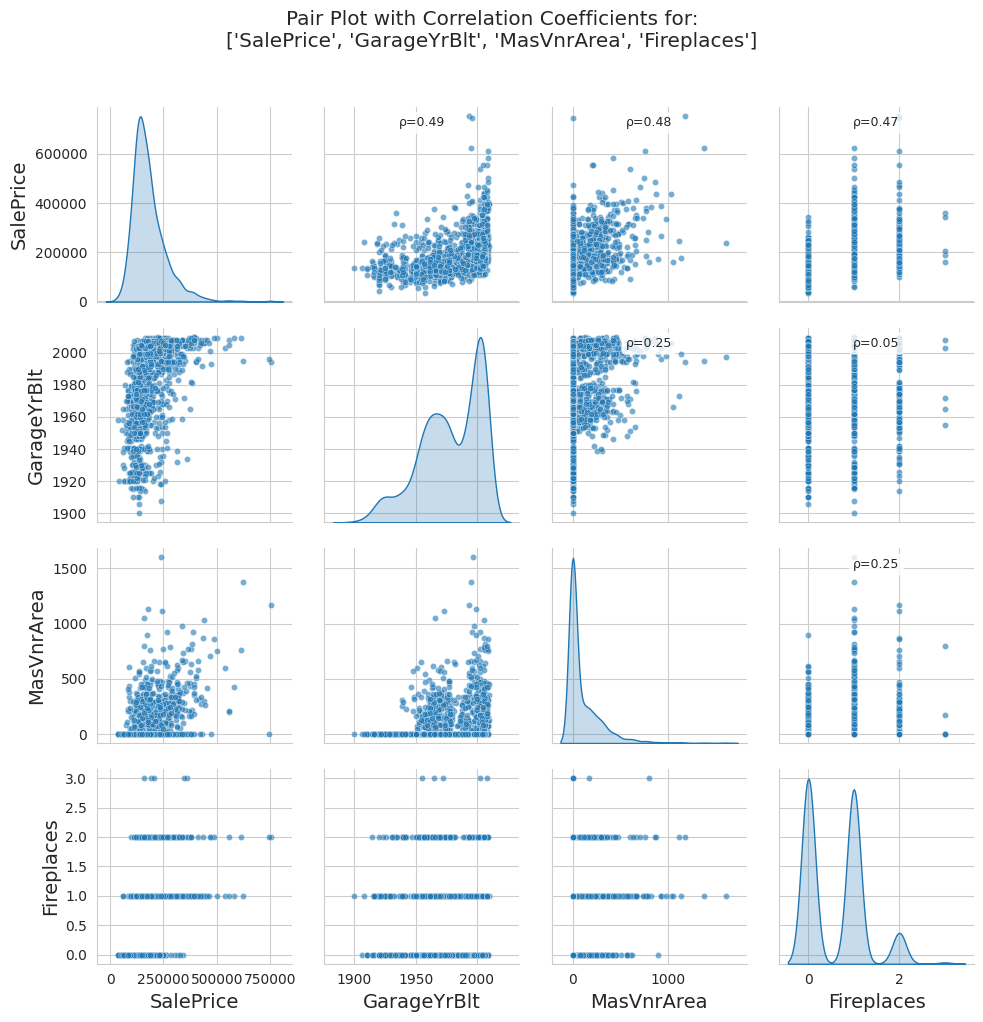

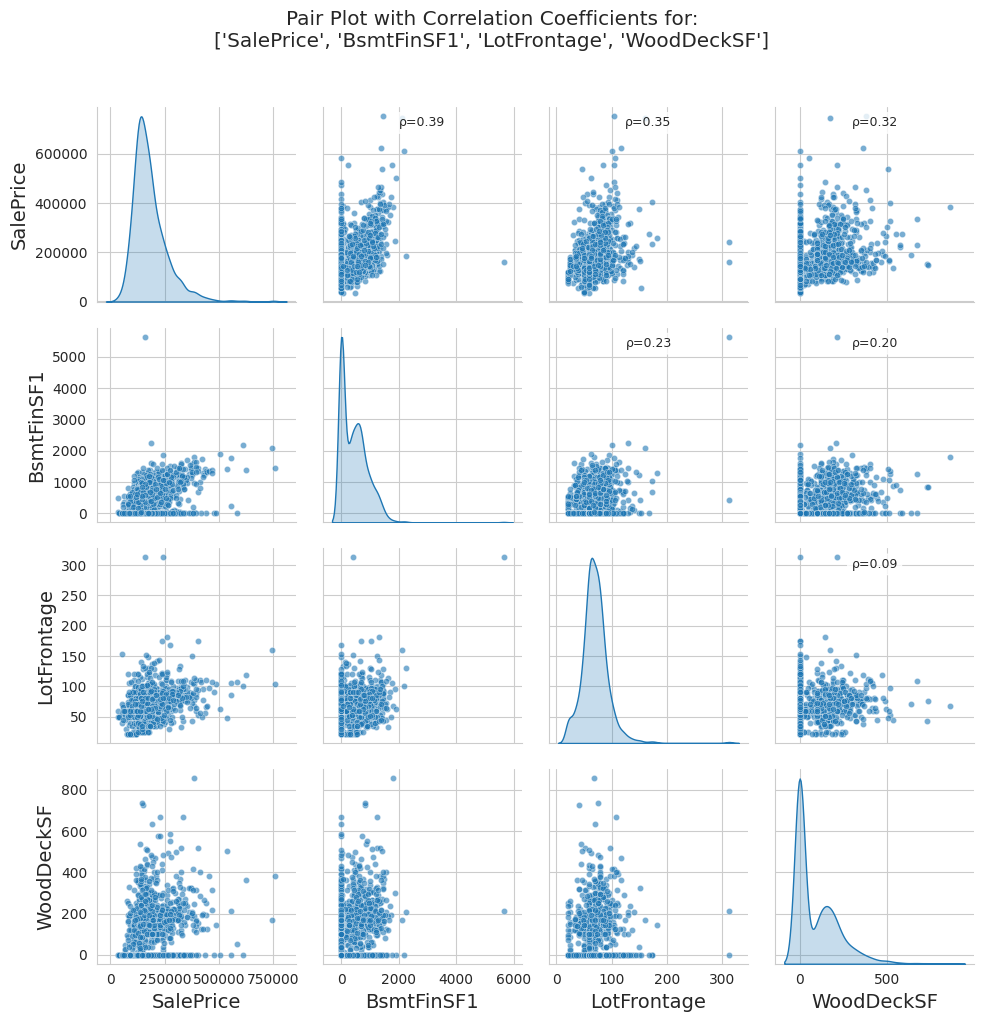

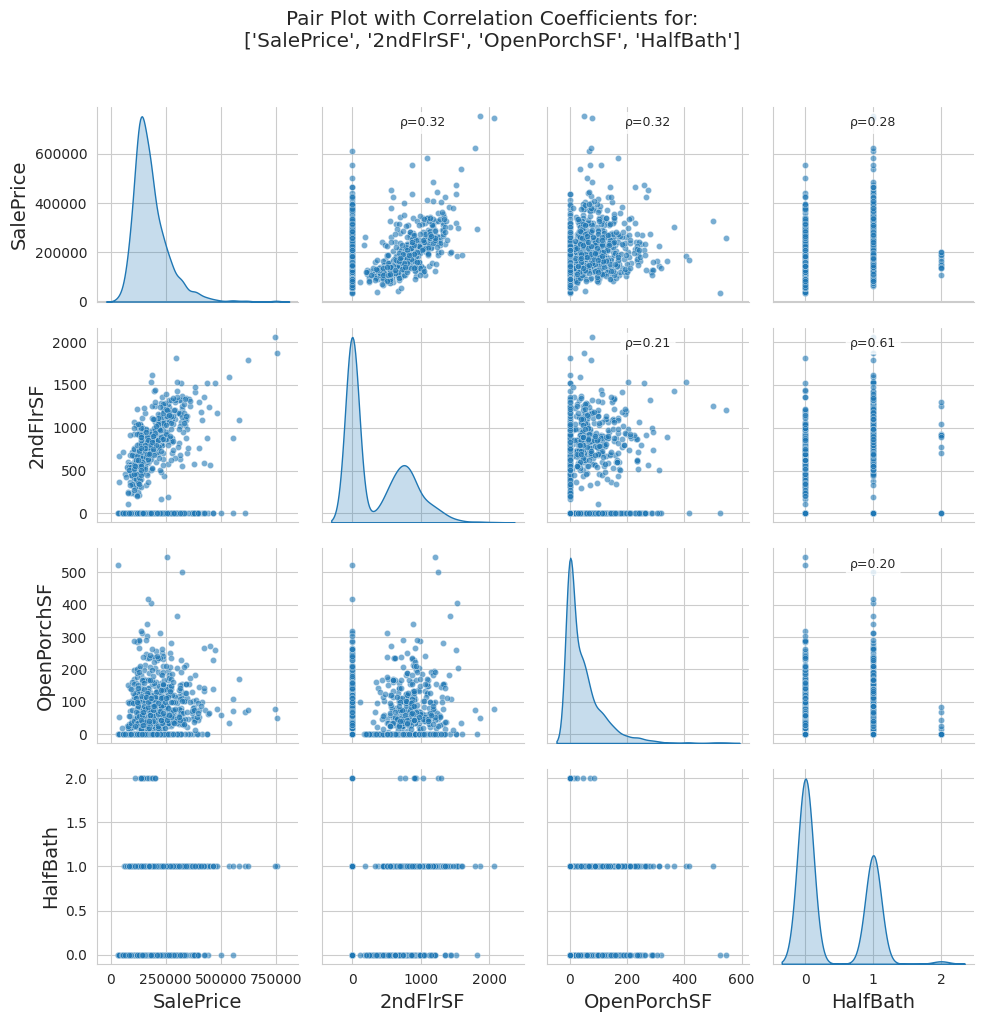

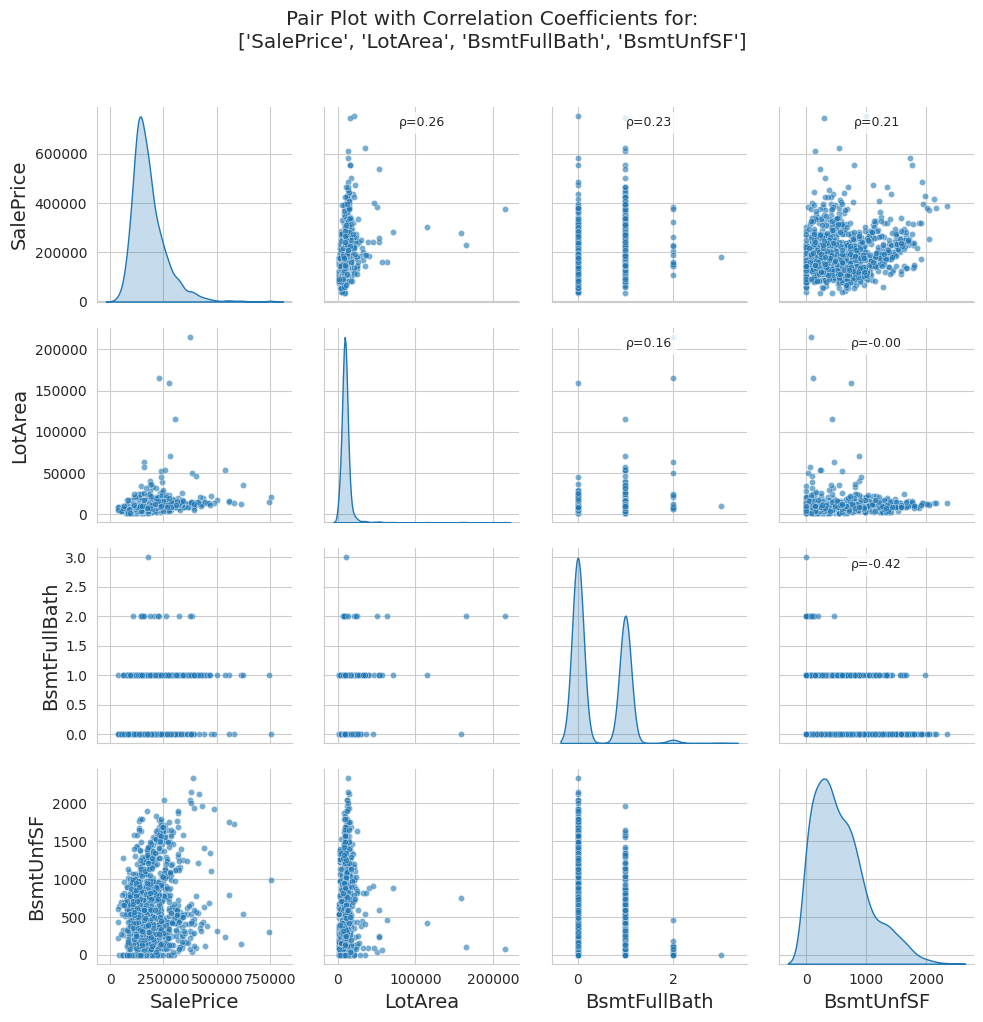

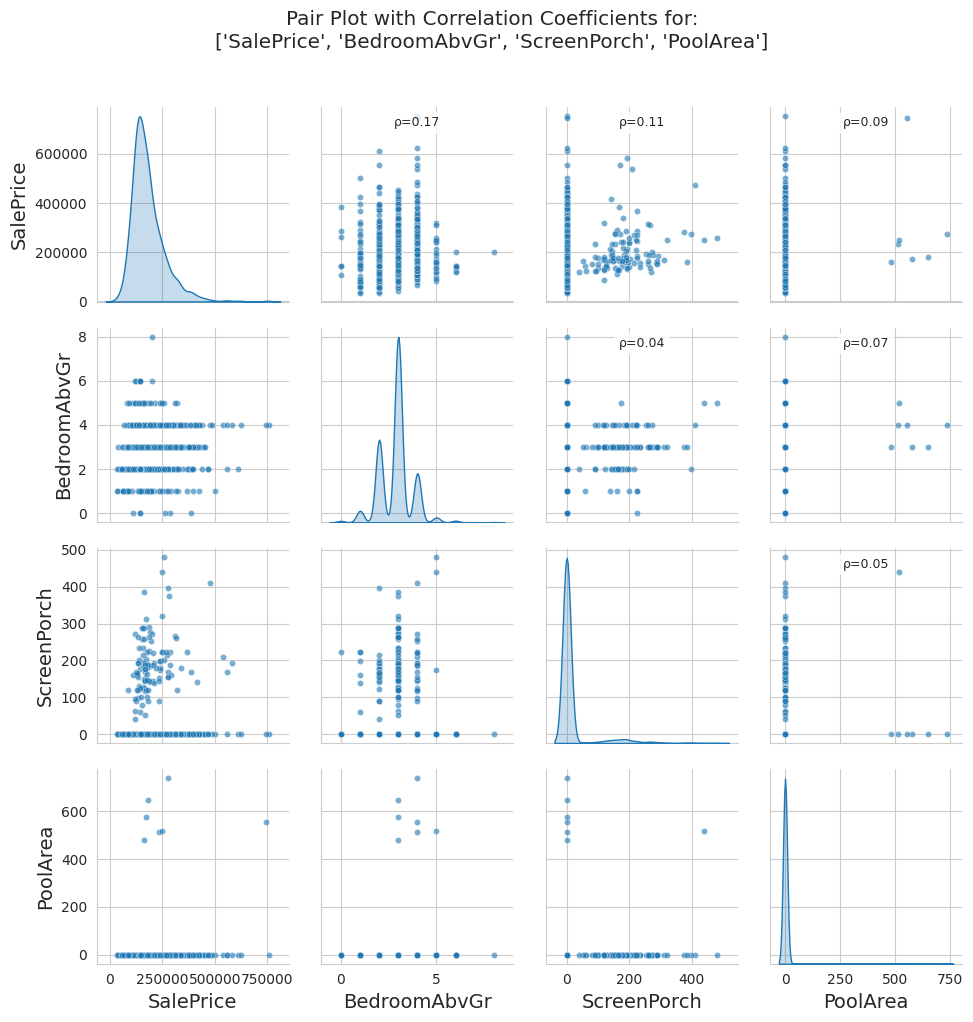

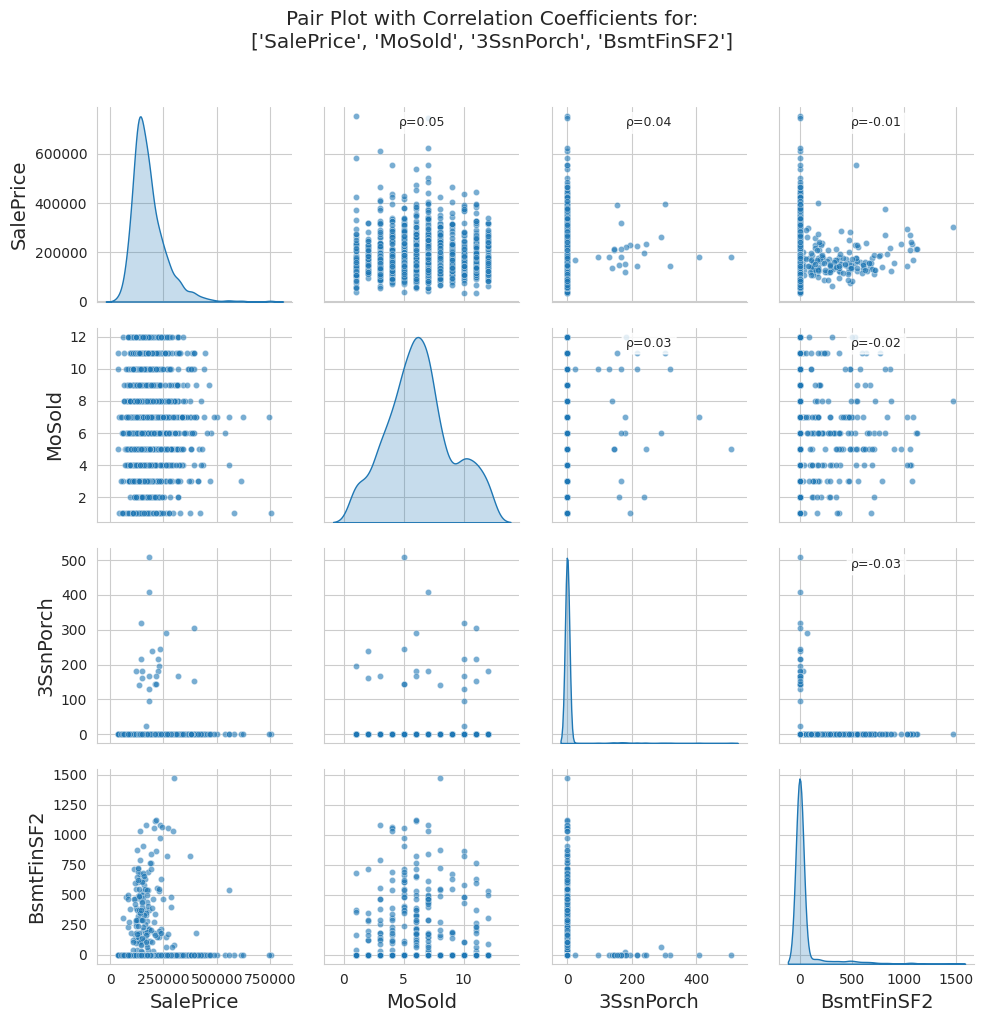

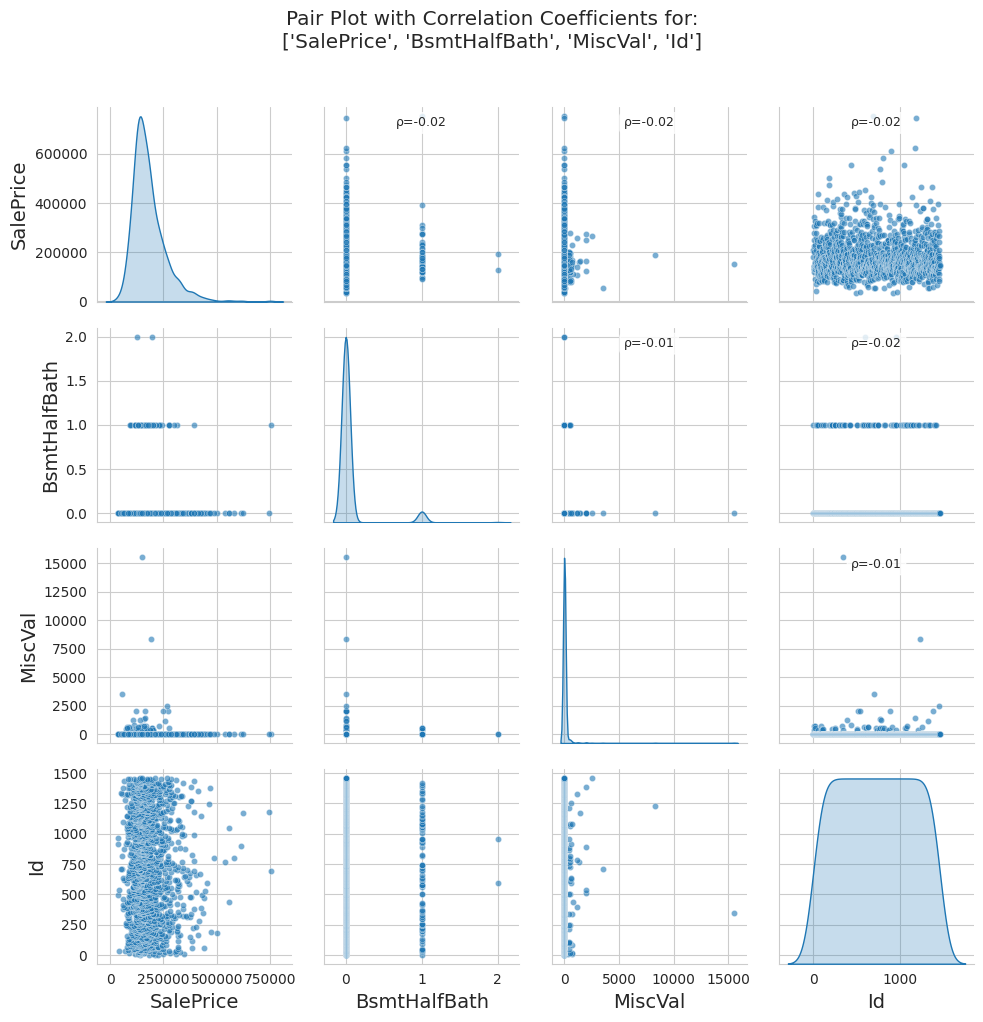

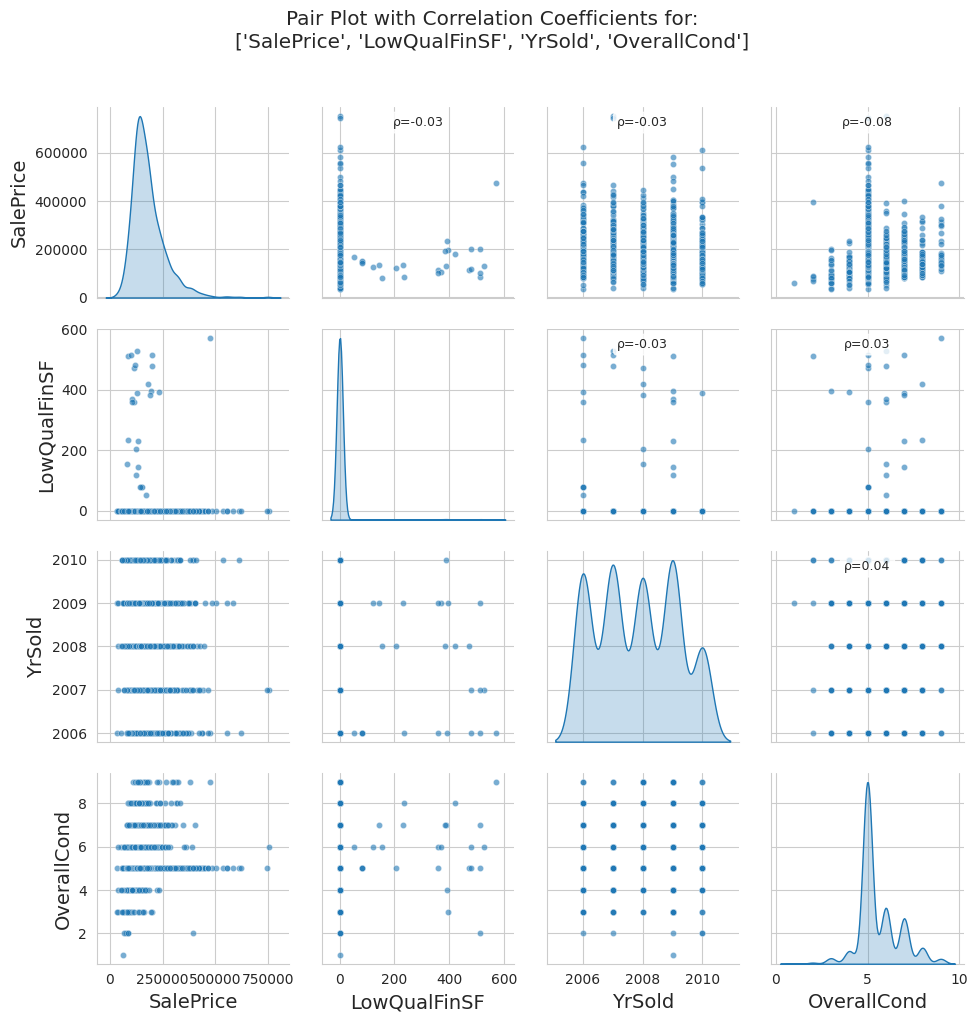

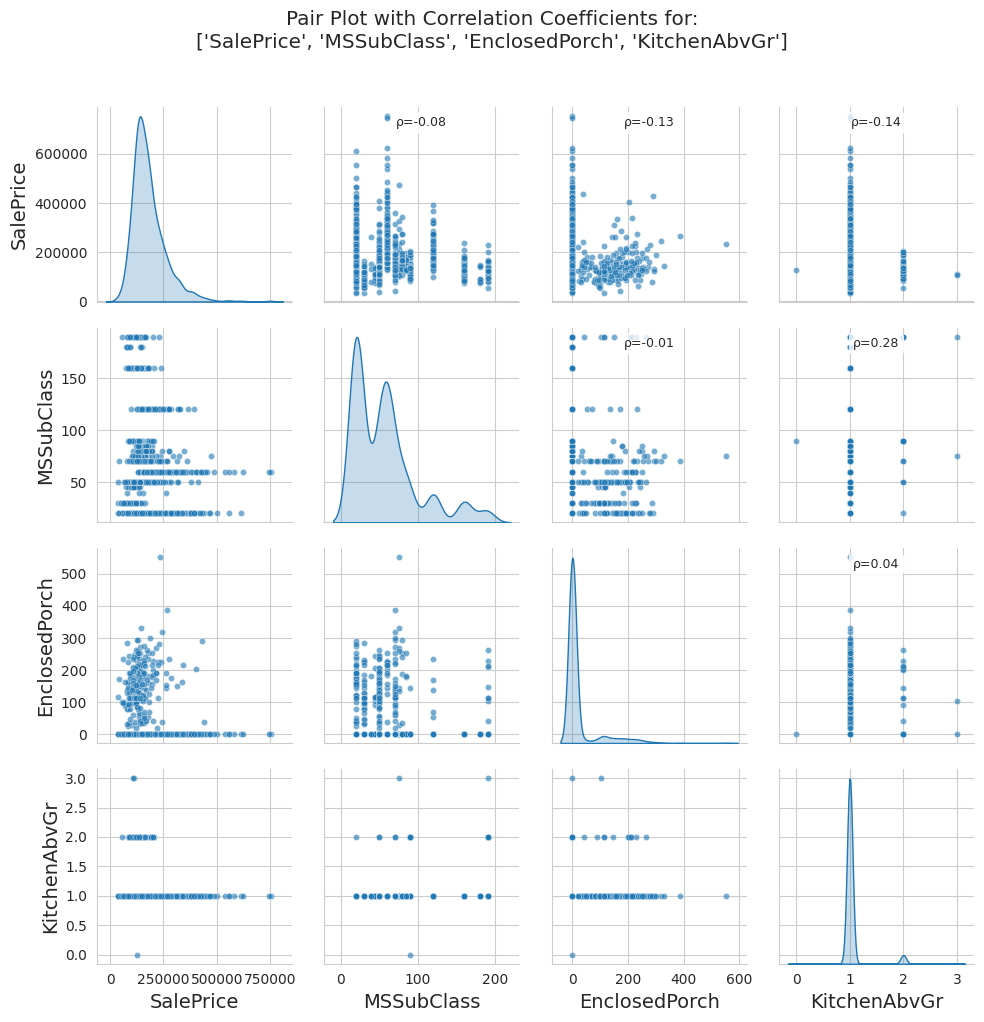

In [27]:
square_correlation_plot(["SalePrice", "TotalBsmtSF", "1stFlrSF", "FullBath"])
square_correlation_plot(["SalePrice", "TotRmsAbvGrd", "YearBuilt", "YearRemodAdd"])
square_correlation_plot(["SalePrice", "GarageYrBlt", "MasVnrArea", "Fireplaces"])
square_correlation_plot(["SalePrice", "BsmtFinSF1", "LotFrontage", "WoodDeckSF"])
square_correlation_plot(["SalePrice", "2ndFlrSF", "OpenPorchSF", "HalfBath"])
square_correlation_plot(["SalePrice", "LotArea", "BsmtFullBath", "BsmtUnfSF"])
square_correlation_plot(["SalePrice", "BedroomAbvGr", "ScreenPorch", "PoolArea"])
square_correlation_plot(["SalePrice", "MoSold", "3SsnPorch", "BsmtFinSF2"])
square_correlation_plot(["SalePrice", "BsmtHalfBath", "MiscVal", "Id"])
square_correlation_plot(["SalePrice", "LowQualFinSF", "YrSold", "OverallCond"])
square_correlation_plot(["SalePrice", "MSSubClass", "EnclosedPorch", "KitchenAbvGr"])

In [ ]:
attributes = ["SalePrice", "TotalBsmtSF", "1stFlrSF", "FullBath"]

scatter_matrix(housing_full[attributes], figsize=(15, 15), grid=True)

plt.show()

## Null values

Listing out the features that have missing values:

In [13]:
# Temporarily increasing the maximum rows that can be printed without an ellipsis
with pd.option_context('display.max_rows', None):
    print(housing_full.isna().any())

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

In [18]:
# Show columns with nulls and their counts
null_counts = housing_full.isnull().sum()
cols_with_nulls = null_counts[null_counts > 0]
with pd.option_context('display.max_rows', None):
    print(cols_with_nulls)

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [15]:
housing_full.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

From the data description there are a number of features in which NA expliclty means the absence of the thing, for example 'No Pool' or 'No Garage'. 
So they can be thought of as a sort of category of their own.

Here are the columns which contain null values and in which null values are not used to convey this information.

In [20]:
features_where_null_is_meaningful = [
    'Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
    'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'
]


cols_needing_attention = cols_with_nulls[~cols_with_nulls.index.isin(features_where_null_is_meaningful)]

with pd.option_context('display.max_rows', None):
    print(cols_needing_attention)

LotFrontage    259
MasVnrType     872
MasVnrArea       8
Electrical       1
GarageYrBlt     81
dtype: int64
